In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
def print_sample(idx):
    plt.matshow(X_train[idx])

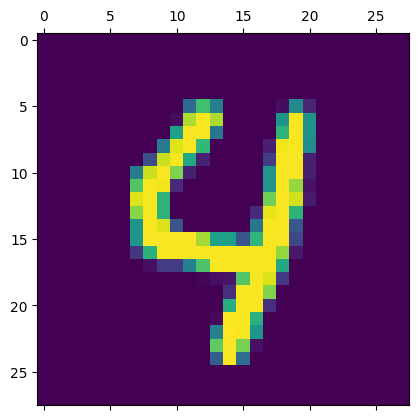

In [8]:
print_sample(564)

In [9]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [10]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [11]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [12]:
# RGB 3 - GRAY 1

In [13]:
X_train.shape , X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
model = keras.Sequential([
    
    keras.layers.Conv2D(filters = 16 , kernel_size = (5,5) ,  input_shape=(28,28,1) , activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Conv2D(filters = 32 , kernel_size = (5,5) , activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [15]:
with tf.device('GPU'):
    model.fit(X_train_scaled , y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 43s 14ms/step - loss: 0.1706 - accuracy: 0.9480
Epoch 2/5
 451/1875 [======>.......................] - ETA: 19s - loss: 0.0555 - accuracy: 0.9832

KeyboardInterrupt: 

In [16]:
model.evaluate(X_test_scaled , y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0479 - accuracy: 0.9843


[0.04792630299925804, 0.9843000173568726]

In [17]:
y_pred = model.predict(X_test_scaled)

313/313 [==============================] - 2s 6ms/step


In [18]:
y_pred = np.array([np.argmax(i) for i in y_pred])

In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)